In [1]:
import os
import json
import re

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def plot_curve(exp_dir: str):
    log_file = os.path.join(exp_dir, "logs.json.txt")
    keys = ["epoch", "train/mean_score", "test/mean_score"]
    rows = []
    with open(log_file, mode="r") as f:
        line = f.readline()
        while line:
            log = json.loads(line)
            if keys[-1] in log:
                rows.append({k: log[k] for k in keys})
            line = f.readline()

    df = pd.DataFrame(rows)
    plt.plot(df["epoch"], df["train/mean_score"], label="train/mean_score")
    plt.plot(df["epoch"], df["test/mean_score"], label="test/mean_score")

    plt.xlabel("epoch")
    plt.ylabel("score")
    # plt.title(os.path.basename(exp_dir))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    basename = os.path.basename(exp_dir.removesuffix("/"))
    filename = re.search(r"\d{2}\.\d{2}\.\d{2}_(.*)", basename).group(1)
    plt.savefig(f"../docs/experiments/assets/{filename}.png")
    plt.show()


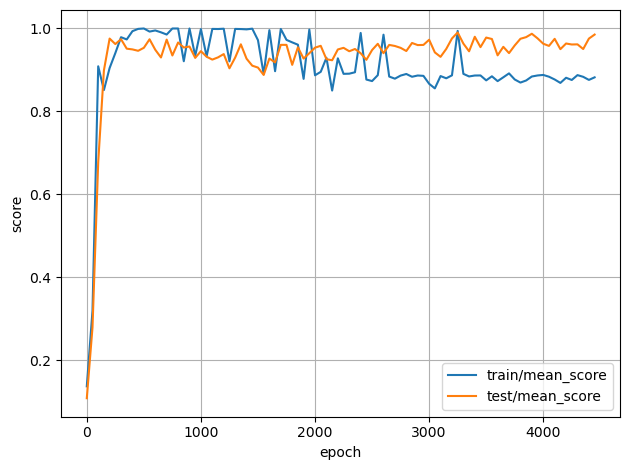

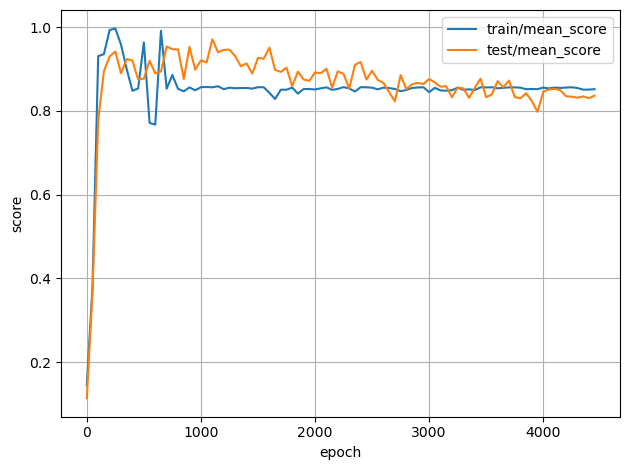

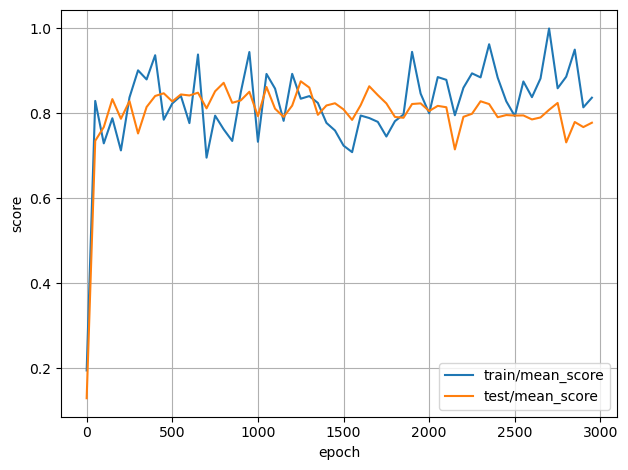

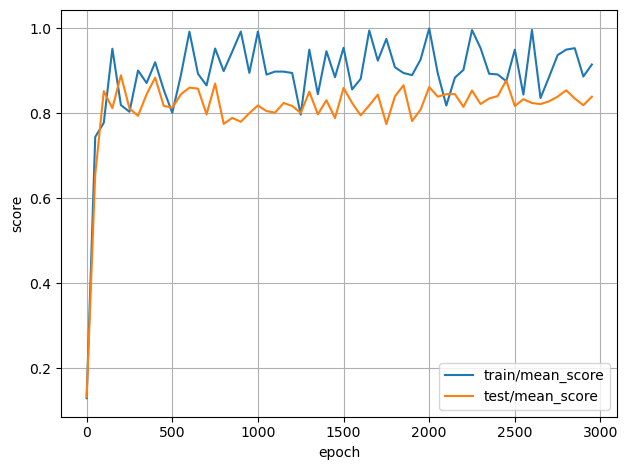

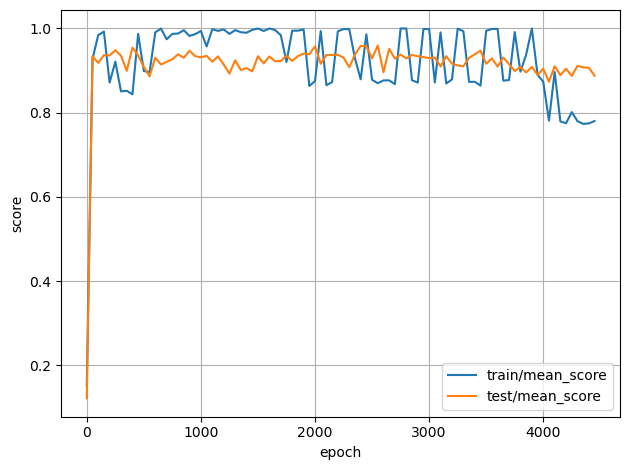

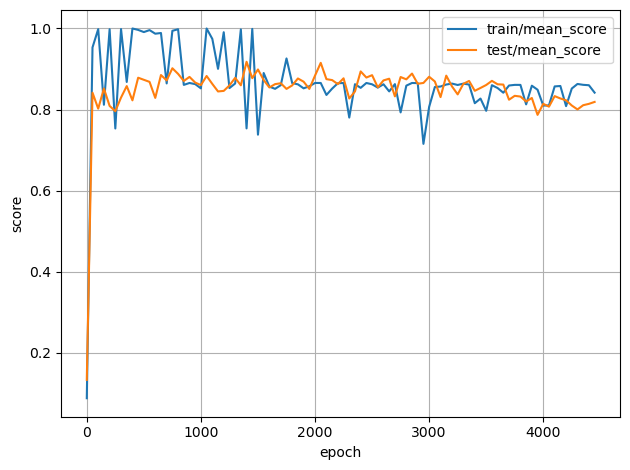

In [3]:
plot_curve("../../data/outputs/2025.08.08/18.28.12_train_dp_transformer_lowdim_v1_pusht_lowdim")
plot_curve("../../data/outputs/2025.08.08/18.28.02_train_dp_transformer_lowdim_v2_pusht_lowdim")
plot_curve("../../data/outputs/2025.08.08/18.28.29_train_dp_cnn_img_v1_pusht_image")
plot_curve("../../data/outputs/2025.08.08/18.28.43_train_dp_cnn_img_v2_pusht_image")
plot_curve("../../data/outputs/2025.08.11/15.11.19_train_dp_cnn_lowdim_v1_pusht_lowdim")
plot_curve("../../data/outputs/2025.08.11/15.27.03_train_dp_cnn_lowdim_v2_pusht_lowdim")